In [1]:
import pandas as pd

df = pd.read_excel("both db.xlsx", sheet_name="winter")


In [3]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  428 non-null    object 
 1   PSSRa    428 non-null    float64
 2   PSSRb    428 non-null    float64
 3   RARSc    428 non-null    float64
 4   PSSRc    428 non-null    float64
 5   CARI     428 non-null    float64
 6   NDVI705  428 non-null    float64
 7   PSNDa    428 non-null    float64
 8   YI       428 non-null    float64
 9   RES      428 non-null    float64
 10  PRI      428 non-null    float64
 11  NDVIa    428 non-null    float64
 12  NDVIb    428 non-null    float64
dtypes: float64(12), object(1)
memory usage: 43.6+ KB


,PSSRa,PSSRb,RARSc,PSSRc,CARI,NDVI705,PSNDa,YI,RES,PRI,NDVIa,NDVIb
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,6.543619,5.620592,5.304991,5.334307,1.546201,0.375749,0.723548,-0.006906,0.458833,0.019559,0.719142,0.717931
std,1.628837,1.258628,1.131066,1.150535,0.353665,0.061755,0.054434,0.003506,0.062412,0.018534,0.054564,0.055066
min,3.620865,3.185210,3.038123,3.019753,0.736208,0.217123,0.567181,-0.016645,0.342576,-0.057982,0.562577,0.560911
25%,5.392493,4.747126,4.540540,4.555959,1.296024,0.332685,0.687133,-0.009161,0.414249,0.009887,0.682558,0.680949
50%,6.157062,5.470272,5.153627,5.168651,1.513292,0.370879,0.720556,-0.007350,0.447663,0.024525,0.715053,0.716009
75%,7.395219,6.387661,5.971130,6.062102,1.757582,0.420837,0.761769,-0.005534,0.494723,0.033363,0.757949,0.757302
max,12.239014,10.427906,9.524077,9.581117,2.758396,0.525403,0.848931,0.009570,0.622536,0.054443,0.846015,0.845393


Free attempt - 5 indices - straightforward

Accuracy: 0.4069767441860465


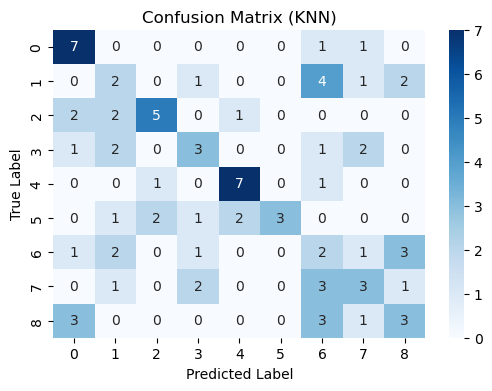

Confusion Matrix (Percentage):
             AVEFA     Barley      ECHCG        Oat      PAPRO      POLAV  \
AVEFA    77.777778   0.000000   0.000000   0.000000   0.000000   0.000000   
Barley    0.000000  20.000000   0.000000  10.000000   0.000000   0.000000   
ECHCG    20.000000  20.000000  50.000000   0.000000  10.000000   0.000000   
Oat      11.111111  22.222222   0.000000  33.333333   0.000000   0.000000   
PAPRO     0.000000   0.000000  11.111111   0.000000  77.777778   0.000000   
POLAV     0.000000  11.111111  22.222222  11.111111  22.222222  33.333333   
Wheat D  10.000000  20.000000   0.000000  10.000000   0.000000   0.000000   
Wheat I   0.000000  10.000000   0.000000  20.000000   0.000000   0.000000   
Wheat S  30.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

           Wheat D    Wheat I  Wheat S  
AVEFA    11.111111  11.111111      0.0  
Barley   40.000000  10.000000     20.0  
ECHCG     0.000000   0.000000      0.0  
Oat      11.111111  22.222222     

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming 'df' is your DataFrame and 'species' is the target column.
# Here, X will be the features (all columns except 'species') and y will be the target.
X = df.drop("species", axis=1)
y = df["species"]

from sklearn.preprocessing import StandardScaler

# Assuming X is your features DataFrame or NumPy array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can use X_scaled in your models instead of X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

# Initialize and train the KNN classifier (here using 5 neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict and compute the confusion matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')
plt.show()

# Calculate the confusion matrix in percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)

# Note: KNN does not provide feature importances directly.
print("KNN does not provide feature importances directly, as it is a distance-based method.")


In [7]:
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.50      0.78      0.61         9
      Barley       0.20      0.20      0.20        10
       ECHCG       0.62      0.50      0.56        10
         Oat       0.38      0.33      0.35         9
       PAPRO       0.70      0.78      0.74         9
       POLAV       1.00      0.33      0.50         9
     Wheat D       0.13      0.20      0.16        10
     Wheat I       0.33      0.30      0.32        10
     Wheat S       0.33      0.30      0.32        10

    accuracy                           0.41        86
   macro avg       0.47      0.41      0.42        86
weighted avg       0.46      0.41      0.41        86



In [9]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Example species lists
monocot_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat", "AVEFA", "ECHCG"]  # example species
dicot_species   = ["PAPRO", "POLAV"]
weed_species    = ["AVEFA", "PAPRO", "POLAV", "ECHCG"]  # example of some species labeled as weeds
crop_species    = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]

# Third-level species groups:
monocot_weed_species = ["AVEFA", "ECHCG"]
monocot_crop_species = ["Barley", "Wheat D", "Wheat I", "Wheat S", "Oat"]
dicot_weed_species   = ["PAPRO", "POLAV"]

# Assume df is your main DataFrame with features and a 'species' column.
# Create first-level category: 'monocot' vs 'dicot'
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
# Create second-level category: 'weed' vs 'crop'
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and targets
X = df[["PSSRa", "PSSRb", "RARSc", "PSSRc", "CARI","PSNDa", "YI", "NDVI705", "RES", "PRI","NDVIa","NDVIb"]]
y_cat1 = df["category1"]  # Level 1 target

# ---------------------------
# Level 1: Monocot vs Dicot Classification using KNN
# ---------------------------
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(
    X, y_cat1, test_size=0.2, random_state=42, stratify=y_cat1
)
clf_cat1 = KNeighborsClassifier(n_neighbors=5)
clf_cat1.fit(X_train_cat1, y_train_cat1)
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Split test data by predicted category1
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

y_test_monocot = df.loc[X_test_monocot.index, 'category2']
y_test_dicot   = df.loc[X_test_dicot.index, 'category2']

# ---------------------------
# Level 2: Weed vs Crop Classification for each category
# For monocots:
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]
X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(
    X_monocot, y_monocot, test_size=0.2, random_state=42, stratify=y_monocot
)
clf_cat2_monocot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)

# For dicots:
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]
X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(
    X_dicot, y_dicot, test_size=0.2, random_state=42, stratify=y_dicot
)
clf_cat2_dicot = KNeighborsClassifier(n_neighbors=5)
clf_cat2_dicot.fit(X_train_di, y_train_di)
y_pred_cat2_dicot = clf_cat2_dicot.predict(X_test_dicot)

# ---------------------------
# Level 3: Species-Level Classification
# Train separate models for each final group:
# Monocot-Weed model
mono_weed_mask = (df['category1'] == 'monocot') & (df['category2'] == 'weed')
X_mono_weed = X[mono_weed_mask]
y_mono_weed = df['species'][mono_weed_mask]
clf_mono_weed = KNeighborsClassifier(n_neighbors=5)
clf_mono_weed.fit(X_mono_weed, y_mono_weed)

# Monocot-Crop model
mono_crop_mask = (df['category1'] == 'monocot') & (df['category2'] == 'crop')
X_mono_crop = X[mono_crop_mask]
y_mono_crop = df['species'][mono_crop_mask]
clf_mono_crop = KNeighborsClassifier(n_neighbors=5)
clf_mono_crop.fit(X_mono_crop, y_mono_crop)

# Dicot-Weed model
dicot_weed_mask = (df['category1'] == 'dicot') & (df['category2'] == 'weed')
X_dicot_weed = X[dicot_weed_mask]
y_dicot_weed = df['species'][dicot_weed_mask]
clf_dicot_weed = KNeighborsClassifier(n_neighbors=5)
clf_dicot_weed.fit(X_dicot_weed, y_dicot_weed)

# Dicot-Crop model (if applicable)
dicot_crop_mask = (df['category1'] == 'dicot') & (df['category2'] == 'crop')
X_dicot_crop = X[dicot_crop_mask]
y_dicot_crop = df['species'][dicot_crop_mask]

# Check if dicot_crop data exists
if len(X_dicot_crop) > 0:
    clf_dicot_crop = KNeighborsClassifier(n_neighbors=5)
    clf_dicot_crop.fit(X_dicot_crop, y_dicot_crop)
else:
    clf_dicot_crop = None  # Set to None if no data available


# ---------------------------
# Final Species-Level Prediction on Test Samples
# For each test sample, based on the predicted category1 and category2, choose the corresponding species-level classifier.
final_species_preds = []
for idx in X_test_cat1.index:
    cat1_pred = clf_cat1.predict(X_test_cat1.loc[[idx]])[0]
    if cat1_pred == 'monocot':
        cat2_pred = clf_cat2_monocot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_mono_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            sp_pred = clf_mono_crop.predict(X_test_cat1.loc[[idx]])[0]
    else:  # dicot
        cat2_pred = clf_cat2_dicot.predict(X_test_cat1.loc[[idx]])[0]
        if cat2_pred == 'weed':
            sp_pred = clf_dicot_weed.predict(X_test_cat1.loc[[idx]])[0]
        else:  # crop
            if clf_dicot_crop is None:
                # Handle the case where there's no dicot crop classifier
                sp_pred = "unknown"  # or handle this case as needed
            else:
                sp_pred = clf_dicot_crop.predict(X_test_cat1.loc[[idx]])[0]
    final_species_preds.append(sp_pred)

final_species_preds = np.array(final_species_preds)
y_test_species = df.loc[X_test_cat1.index, 'species']

final_accuracy = accuracy_score(y_test_species, final_species_preds)
print("Final Species-Level Accuracy:", final_accuracy)

# Compute confusion matrix in percentages:
cm = confusion_matrix(y_test_species, final_species_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
class_labels = np.unique(y_test_species)
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
print("Confusion Matrix (Percentage):")
print(cm_df)


Final Species-Level Accuracy: 0.6627906976744186
Confusion Matrix (Percentage):
             AVEFA     Barley      ECHCG        Oat      PAPRO      POLAV  \
AVEFA    66.666667  11.111111   0.000000   0.000000   0.000000   0.000000   
Barley   14.285714  85.714286   0.000000   0.000000   0.000000   0.000000   
ECHCG     0.000000  12.500000  75.000000   0.000000   0.000000   0.000000   
Oat       9.090909   9.090909   0.000000  63.636364   0.000000   0.000000   
PAPRO     0.000000   0.000000  18.181818   0.000000  81.818182   0.000000   
POLAV    12.500000   0.000000   0.000000   0.000000  25.000000  62.500000   
Wheat D   0.000000  27.777778   0.000000   0.000000   0.000000   5.555556   
Wheat I   0.000000   0.000000   0.000000   0.000000   0.000000  11.111111   
Wheat S   0.000000  20.000000   0.000000   0.000000   0.000000   0.000000   

           Wheat D    Wheat I    Wheat S  
AVEFA     0.000000   0.000000  22.222222  
Barley    0.000000   0.000000   0.000000  
ECHCG     0.000000  

In [11]:
# Generate classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test_species, final_species_preds, zero_division=0))

KNN Classification Report:
              precision    recall  f1-score   support

       AVEFA       0.67      0.67      0.67         9
      Barley       0.40      0.86      0.55         7
       ECHCG       0.75      0.75      0.75         8
         Oat       1.00      0.64      0.78        11
       PAPRO       0.82      0.82      0.82        11
       POLAV       0.71      0.62      0.67         8
     Wheat D       0.69      0.61      0.65        18
     Wheat I       0.75      0.67      0.71         9
     Wheat S       0.20      0.20      0.20         5

    accuracy                           0.66        86
   macro avg       0.67      0.65      0.64        86
weighted avg       0.71      0.66      0.67        86

